In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
#VIEWING DATSET
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
#Checking for null values.
null_df = df.isnull()
print(null_df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [6]:
null_df.apply(lambda x: x.unique())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#There are no null values in the dataframe

In [8]:
#Seeing the statistical measures of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#DATA PREPARATION/MUNGING

#dropping customerID column as it doesnot affect churn
df.drop('customerID',axis='columns',inplace=True)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#Maintaining data integrity
#The 'TotalCharges' is a object class whereas MonthlyCharges in float which seems to be a redundancy
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
#The values are enclosed in quotation marks hence are strings
#So converting to numeric value
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
#While converting to numeric values errors arise for empty strings(" ")
#So using errors='coerce' to convert invalid values to specified alternative
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
#The TotalCharges with empty spaces are removed.
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [15]:
#only 11 entries are empty so we can drop these empty rows.
df = df[df.TotalCharges!=' ']

In [16]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
#Exploratory data analysis
#Analyzing the dataset with help of figures and plots
#Understanding the distribution on numeric features
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()


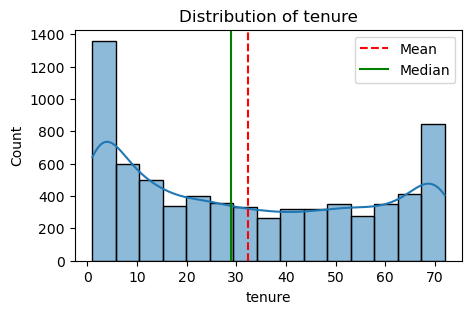

In [19]:
plot_histogram(df, "tenure")

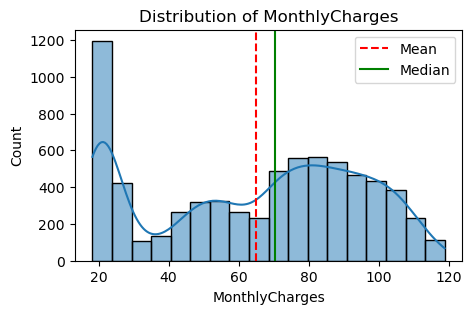

In [20]:
plot_histogram(df, "MonthlyCharges")

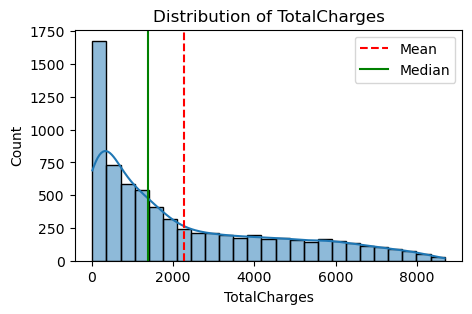

In [21]:
plot_histogram(df, "TotalCharges")

In [22]:
#BOX PLOT FOR NUMERIC FEATURES
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

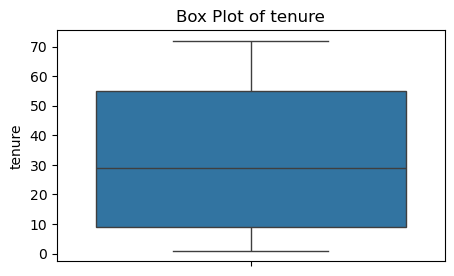

In [23]:
plot_boxplot(df, "tenure")

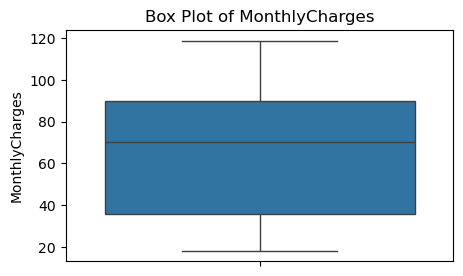

In [24]:
plot_boxplot(df, "MonthlyCharges")

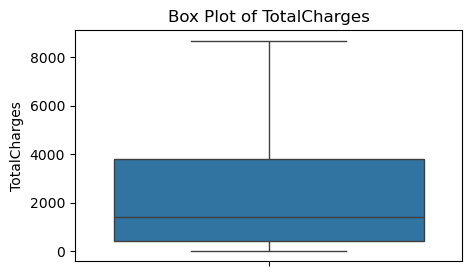

In [25]:
plot_boxplot(df, "TotalCharges")

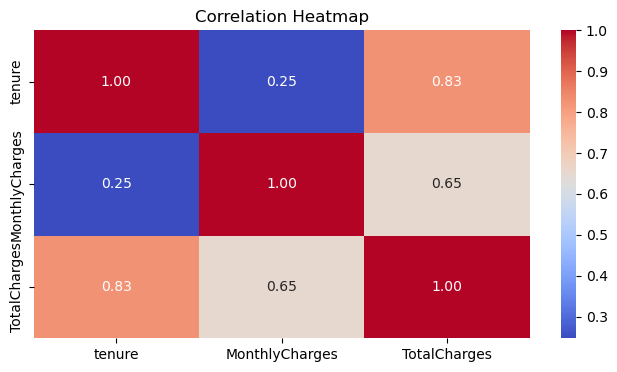

In [26]:
#correlation heatmap for numerical columns
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
#LABELING CATEGORICAL DATA
#Making a fxn for printing columns with 'object' data types and all the unique values it contains
def unique_col(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f'{columns} : {df[columns].unique()}')

In [28]:
unique_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
#The 'No phone service', 'No internet service' are simply replaced by 'No'.
df.replace('No internet service','No', inplace=True)
df.replace('No phone service','No', inplace=True)

In [30]:
unique_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
#label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_5750/3889943435.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [32]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [33]:
#The tenure, MonthlyCharges and TotalCharges column has higher values than the other features
#They can dominate during model training so they need to be scaled and normalized
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [34]:
#save the scaler as pickle file
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)

In [35]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [36]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [37]:
df['InternetService'].unique()

array([0, 1, 2])

In [38]:
df['Contract'].unique()

array([0, 1, 2])

In [39]:
df['PaymentMethod'].unique()

array([2, 3, 0, 1])

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [41]:
#**Traianing and test data split**
X = df.drop(columns=["Churn"])#Features(all columns except 'Churn')
y = df["Churn"]#target variable

In [42]:
# import xgboost as xgb
# import sklearn

# print(xgb.__version__)  # Ensure it's >= 1.6.0
# print(sklearn.__version__)  # Ensure it's >= 0.24.0

In [43]:
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# # Define cross-validation
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Model configurations
# models = {
#     'MLP': (ImbPipeline([
#         ('smote', SMOTE(random_state=42)),
#         ('clf', MLPClassifier(max_iter=5000))
#     ]), {
#         'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],
#         'clf__activation': ['tanh', 'relu'],
#         'clf__solver': ['adam', 'sgd'],
#         'clf__learning_rate': ['constant', 'adaptive']
#     }),
#     'SVM': (ImbPipeline([
#        ('smote', SMOTE(random_state=42)),
#        ('clf', SVC(probability=True))
#    ]), {
#        'clf__C': [0.1, 1, 10],
#        'clf__kernel': ['linear', 'rbf', 'poly'],
#        'clf__degree': [1, 2]
#    }),
#     'LogReg': (ImbPipeline([
#         ('smote', SMOTE(random_state=42)),
#         ('clf', LogisticRegression(max_iter=2000))
#     ]), {
#         'clf__C': [0.1, 1, 10, 100],
#         'clf__solver': ['liblinear', 'saga', 'lbfgs']
#     }),
    
#     'RandomForest': (ImbPipeline([
#         ('smote', SMOTE(random_state=42)),
#         ('clf', RandomForestClassifier())
#     ]), {
#         'clf__n_estimators': [50, 100, 200, 300],
#         'clf__max_depth': [None, 10, 20, 30],
#         'clf__min_samples_split': [2, 5, 10]
#     }),
    
#     'XGBoost': (ImbPipeline([
#         ('smote', SMOTE(random_state=42)),
#         ('clf', xgb.XGBClassifier(
#             objective='binary:logistic',
#             use_label_encoder=False,
#             eval_metric='logloss'
#         ))
#     ]), {
#         'clf__n_estimators': [50, 100, 200, 300],
#         'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
#         'clf__max_depth': [3, 5, 7, 9],
#         'clf__gamma': [0, 0.1, 0.2, 0.3, 0.4],
#         'clf__reg_lambda': [0.1, 1, 10],
#         'clf__min_child_weight': [1, 2, 3]
#     })
# }

# # Storage for results
# best_models = {}
# cv_scores = {}
# test_accuracies = {}
# test_confusion_matrices = {}
# test_reports = {}  # For storing classification reports

# # Model training and evaluation
# for model_name, (pipeline, params) in models.items():
#     print(f"\n\033[1m=== {model_name} ===\033[0m")
    
#     # Hyperparameter tuning
#     search = RandomizedSearchCV(
#         pipeline, params, cv=kf, scoring='roc_auc',
#         n_iter=10, n_jobs=-1, random_state=42
#     )
#     search.fit(X_train, y_train)
    
#     # Store best model and CV score
#     best_models[model_name] = search.best_estimator_
#     cv_scores[model_name] = search.best_score_
    
#     # Test set evaluation
#     y_pred = search.best_estimator_.predict(X_test)
#     test_accuracies[model_name] = accuracy_score(y_test, y_pred)
#     test_confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)
#     test_reports[model_name] = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    
#     # Print metrics
#     print(f"Best params: {search.best_params_}")
#     print(f"CV ROC-AUC: {cv_scores[model_name]:.4f}")
#     print(f"Test Accuracy: {test_accuracies[model_name]:.4f}")
#     print(f"Test ROC-AUC: {roc_auc_score(y_test, search.best_estimator_.predict_proba(X_test)[:, 1]):.4f}")

# # Confusion matrix grid
# plt.figure(figsize=(15, 10))
# for idx, (name, cm) in enumerate(test_confusion_matrices.items(), 1):
#     plt.subplot(2, 3, idx)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                 xticklabels=['No churn', 'Churn'],
#                 yticklabels=['No Churn', 'Churn'])
#     plt.title(f"{name}\nAccuracy: {test_accuracies[name]:.4f}")
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
# plt.tight_layout()
# plt.suptitle("Confusion Matrices - Test Set Performance", y=1.02)
# plt.show()

# # Performance comparison
# fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# # ROC-AUC plot
# sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()), palette="viridis", ax=ax[0])
# ax[0].set_title("Cross-Validated ROC-AUC Scores")
# ax[0].set_ylim(0, 1)
# ax[0].tick_params(axis='x', rotation=45)

# # Accuracy plot
# sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), palette="coolwarm", ax=ax[1])
# ax[1].set_title("Test Set Accuracy Scores")
# ax[1].set_ylim(0, 1)
# ax[1].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()

# # Classification reports for all models
# print("\n\033[1m=== Detailed Classification Reports ===\033[0m")
# for model_name, report in test_reports.items():
#     print(f"\n\033[1m{model_name}\033[0m")
#     print(report)

# # Best model summary
# best_model_name = max(cv_scores, key=cv_scores.get)
# print(f"\n\033[1mBest Performing Model: {best_model_name}\033[0m")
# print(f"Cross-Validated ROC-AUC: {cv_scores[best_model_name]:.4f}")
# print(f"Test Accuracy: {test_accuracies[best_model_name]:.4f}")
# print("\nClassification Report:")
# print(test_reports[best_model_name])

In [44]:
####TRAINING A CUSTOM BUILD RANDOM FOREST CLASSIFIER#####
from algorithm import RandomForest


In [45]:
rfc = RandomForest(n_trees=300, max_depth=5,min_samples_split=10,n_jobs=-1) #Using best parameters for accuracy obtained from grid search

In [46]:
#Applying smote on training data before training the model so address class imbalances problem
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [47]:
# print(y_train_smote.value_counts())

In [48]:
#####THE DATASET IS SYNTHETICALLY BALANCED########

In [49]:
#TRAINING THE MODEL
rfc.fit(X_train_smote, y_train_smote)
print(type(X_train_smote))

<class 'numpy.ndarray'>


In [50]:
y_pred = rfc.predict(X_test.values)
y_test_pred_proba = rfc.predict_proba(X_test.values)[:, 1]
# Evaluate Test Accuracy & ROC AUC
test_accuracy = accuracy_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC:", test_roc_auc)
# X_train_smote1 = pd.DataFrame(X_train_smote)  # Optionally set column names
# # Make predictions on the training set to check training accuracy
# y_train_pred = rfc.predict(X_train_smote1.values)
# Make predictions on the training set (for accuracy and ROC AUC)
y_train_pred = rfc.predict(X_train_smote)
y_train_pred_proba = rfc.predict_proba(X_train_smote)[:, 1]
# Evaluate Training Accuracy & ROC AUC
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_roc_auc = roc_auc_score(y_train_smote, y_train_pred_proba)

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC:", train_roc_auc)
# print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.7377398720682303
Test ROC AUC: 0.8326638056437042
Training Accuracy: 0.8025423728813559
Training ROC AUC: 0.8899547104104498


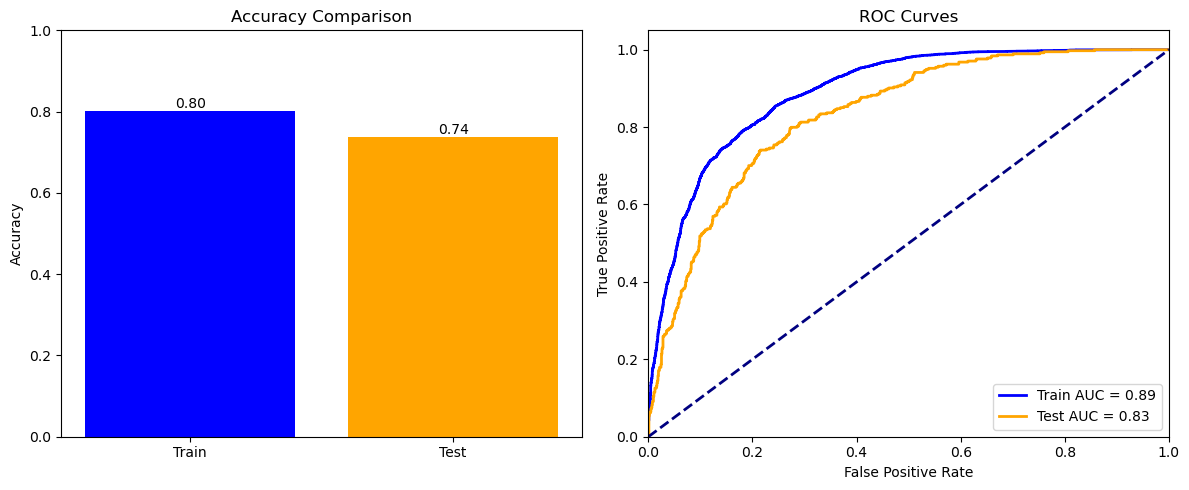

In [129]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc

# Generate predictions
y_train_pred = rfc.predict(X_train_smote)
y_test_pred = rfc.predict(X_test)

# Generate probabilities for AUC
y_train_proba = rfc.predict_proba(X_train_smote)[:, 1]
y_test_proba = rfc.predict_proba(X_test)[:, 1]

# Calculate accuracy scores
train_acc = accuracy_score(y_train_smote, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate ROC AUC scores
train_fpr, train_tpr, _ = roc_curve(y_train_smote, y_train_proba)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_proba)
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot accuracy comparison
plt.subplot(1, 2, 1)
bars = plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Plot ROC curves
plt.subplot(1, 2, 2)
plt.plot(train_fpr, train_tpr, color='blue', lw=2, 
         label=f'Train AUC = {train_auc:.2f}')
plt.plot(test_fpr, test_tpr, color='orange', lw=2,
         label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [52]:
#Evaluate confusion matrix and classification report
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confsuion Matrix:
 [[738 295]
 [ 74 300]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [53]:
# save the trained model as a pickle file
filename = 'ChurnModel.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [54]:
# load teh saved model
model = pickle.load(open(filename, 'rb'))

In [55]:
#Make a prediction model
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 0.00,
    'PhoneService': 'No',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges':0.354229,
    'TotalCharges':0.01 
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = model.predict(X_test)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")

[0 1 0 ... 0 0 0]
Prediction: No Churn


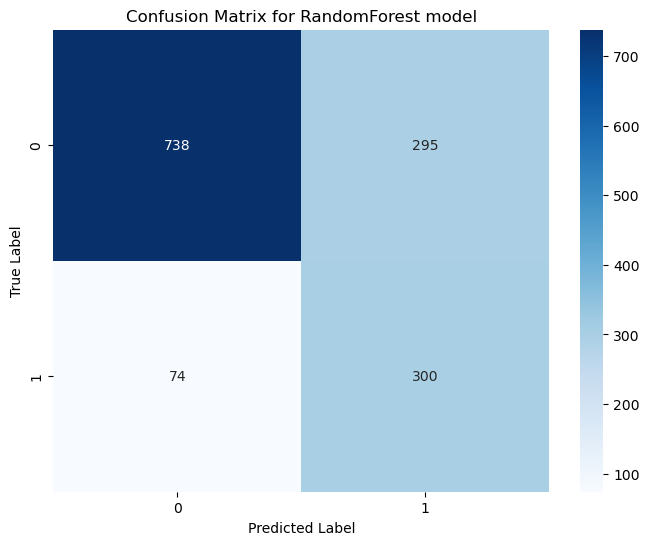

In [56]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# confusion_matrices[model_name] = cm
    
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix for RandomForest model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()